## 불균형 데이터와 설명 가능성을 고려한 게임 재화 어뷰징 검출을 위한 지도, 자기지도 및 준지도 학습 모델 - EDA
- **Problem**

현재 특정 온라인 RPG 게임에서는 골드를 부당하게 얻는 어뷰저를 탐지하고 제재하는 업무를 수행하고 있습니다.

이미 일부 유저에 대해서는 정상적인 플레이어 여부를 확인했지만, 아직 어뷰저 여부를 판별할 수 없는 다수의 유저가 남아 있습니다.

이러한 상황에서 모든 유저를 개별적으로 조사하는 것은 비효율적이므로 데이터 분석을 통해 어뷰저를 자동으로 식별하는 로직을 개발하고자 합니다.

- **Process**
1. 데이터셋 확인
2. EDA
3. Visualize Abuser VS Non Abuser
4. Feature Engeeniring

In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [1]:
# Import Python Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### 1. 데이터셋 확인
* 데이터셋 설명
  - newID : 캐릭터 식별자(ID), 범주형
  - char_jobcode : 캐릭터 직업, 범주형
  - char_level : 캐릭터의 레벨, 수치형
  - logging_timestamp : 해당 스냅샷 로그가 찍힌 시점
  - charStatA~G : 캐릭터의 스탯 정보 (예: 캐릭터의 매력도), 수치형
  - socialAmountA : 타 캐릭터와의 인터렉션 정보로 그 양을 의미 (예: 등록된 친구 수), 수치형
  - socialBooleanA~B : 타 캐릭터와의 인터렉션 정보로 발생 여부를 의미 (0 또는 1, 예: 길드 가입 여부), 범주형
  - socialSessionAmountA~B : 타 캐릭터의 인터렉션 정보로 스냅샷 세션 내 발생한 양을 의미 (예: 세션 중 발생시킨 채팅 횟수), 수치형
  - activityCumulativeAmountA~B : 캐릭터의 액션 정보로 생성시점부터 누적되는 값 (예: 누적 이벤트X 발생횟수), 수치형
  - accountMetaAmountA : 캐릭터가 속한 계정의 메타 정보로 세션에 관계없이 갱신 (예: 캐릭터가 소속된 계정상의 정보), 범주형
  - charSessionAmountA~D : 캐릭터가 세션 중 발생시킨 양 (예: 세션 중 특정맵A 방문 횟수), 수치형
  - actionSessionAmountA~N : 캐릭터가 세션 중 이동한 양, 수치형
  - tradeSesstionAmountA~N : 캐릭터가 세션 중 발생시킨 액션의 양 (예: 세션 중 사냥 횟수), 수치형
  - tradeSessionAmountA~E : 캐릭터가 세션 중 발생시킨 거래의 양 (예: 세션 중 개인 간 거래 횟수), 수치형
  - isAbuser (Target label) : 어뷰저 여부 (0: 어뷰저X, 1:어뷰저, -1:아직 조사X), 범주형

In [38]:
# 데이터 가져오기
data = pd.read_csv('/content/gdrive/My Drive/data/data.csv')
data.head()

,newID,char_jobcode,char_level,logging_timestamp,charStatA,charStatB,charStatC,charStatD,charStatE,charStatF,...,actionSessionAmountH,actionSessionAmountI,actionSessionAmountJ,actionSessionAmountK,actionSessionAmountL,actionSessionAmountM,actionSessionAmountN,tradeSessionAmountD,tradeSessionAmountE,isAbuser
0,0,0,10,2022-06-26 08:59:04,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,-1
1,0,0,31,2022-06-26 09:29:06,0,0,0,0,2,0,...,0,0,0,2,146,0,106,0,0,-1
2,0,0,40,2022-06-26 09:59:13,0,0,0,0,2,0,...,0,0,0,2,229,0,172,0,0,-1
3,0,0,61,2022-06-26 10:29:14,0,0,0,0,6,0,...,1,2,0,2,583,0,615,0,0,-1
4,0,0,61,2022-06-27 07:51:56,0,0,0,0,6,0,...,0,1,0,17,1,0,0,0,0,-1


### 2. EDA

In [ ]:
# 데이터 타입 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104399 entries, 0 to 104398
Data columns (total 44 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   newID                      104399 non-null  int64 
 1   char_jobcode               104399 non-null  int64 
 2   char_level                 104399 non-null  int64 
 3   logging_timestamp          104399 non-null  object
 4   charStatA                  104399 non-null  int64 
 5   charStatB                  104399 non-null  int64 
 6   charStatC                  104399 non-null  int64 
 7   charStatD                  104399 non-null  int64 
 8   charStatE                  104399 non-null  int64 
 9   charStatF                  104399 non-null  int64 
 10  charStatG                  104399 non-null  int64 
 11  socialAmountA              104399 non-null  int64 
 12  socialBooleanA             104399 non-null  int64 
 13  socialBooleanB             104399 non-null  

In [ ]:
# 데이터 통계 요약
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
newID,104399.0,NaN,NaN,NaN,7484.51215,4318.413739,0.0,3763.0,7500.0,11254.0,14915.0
char_jobcode,104399.0,NaN,NaN,NaN,35.396651,21.345751,0.0,29.0,30.0,31.0,165.0
char_level,104399.0,NaN,NaN,NaN,48.324553,22.407708,10.0,31.0,49.0,61.0,159.0
logging_timestamp,104399,99223,2022-06-13 01:59:12,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
charStatA,104399.0,NaN,NaN,NaN,0.070815,1.01731,-10.0,0.0,0.0,0.0,56.0
charStatB,104399.0,NaN,NaN,NaN,39.750055,402.584594,0.0,0.0,0.0,0.0,4921.0
charStatC,104399.0,NaN,NaN,NaN,143.4851,1114.480669,0.0,0.0,0.0,0.0,11145.0
charStatD,104399.0,NaN,NaN,NaN,0.631481,11.328005,0.0,0.0,0.0,0.0,570.0
charStatE,104399.0,NaN,NaN,NaN,97.709269,821.057198,0.0,0.0,0.0,6.0,11402.0
charStatF,104399.0,NaN,NaN,NaN,16.134082,264.802276,0.0,0.0,0.0,0.0,5038.0


In [ ]:
# 결측치 확인
data.isna().sum()

newID                        0
char_jobcode                 0
char_level                   0
logging_timestamp            0
charStatA                    0
charStatB                    0
charStatC                    0
charStatD                    0
charStatE                    0
charStatF                    0
charStatG                    0
socialAmountA                0
socialBooleanA               0
socialBooleanB               0
socialSessionAmountA         0
activityCumulativeAmountA    0
accountMetaAmountA           0
charSessionAmountA           0
charSessionAmountB           0
charMoveSessionAmountA       0
charSessionAmountC           0
socialSessionAmountB         0
actionSessionAmountA         0
charSessionAmountD           0
activityCumulativeAmountB    0
actionSessionAmountB         0
actionSessionAmountC         0
actionSessionAmountD         0
actionSessionAmountE         0
tradeSessionAmountA          0
tradeSessionAmountB          0
tradeSessionAmountC          0
actionSe

In [ ]:
# 중복 확인
data.nunique()

newID                        10441
char_jobcode                   165
char_level                     138
logging_timestamp            99223
charStatA                       23
charStatB                      264
charStatC                       88
charStatD                       46
charStatE                      188
charStatF                       78
charStatG                      329
socialAmountA                   95
socialBooleanA                   2
socialBooleanB                   1
socialSessionAmountA             9
activityCumulativeAmountA      229
accountMetaAmountA               1
charSessionAmountA              43
charSessionAmountB               1
charMoveSessionAmountA          70
charSessionAmountC               9
socialSessionAmountB            81
actionSessionAmountA          6770
charSessionAmountD              14
activityCumulativeAmountB        8
actionSessionAmountB          2132
actionSessionAmountC            77
actionSessionAmountD            11
actionSessionAmountE

-1    88780
 1     9370
 0     6249
Name: isAbuser, dtype: int64


Text(0, 0.5, 'Count')

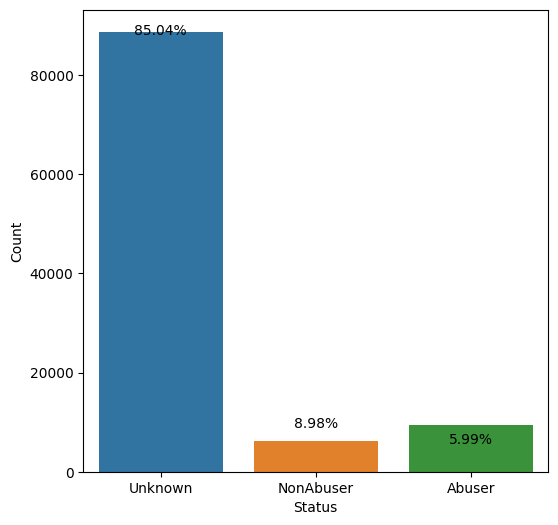

In [92]:
# Target label별 개수 확인 - All
print(data['isAbuser'].value_counts())

fig, ax = plt.subplots(figsize=(6, 6))

sns.countplot(x='isAbuser', data=data, ax=ax)

for index, value in enumerate(data['isAbuser'].value_counts()):
    label = '{}%'.format(round((value / data['isAbuser'].shape[0]) * 100, 2))
    ax.annotate(label,
                xy=(index, value + 250),
                ha='center',
                va='center')

ax.set_xticklabels(['Unknown', 'NonAbuser', 'Abuser'])
ax.set_xlabel('Status')
ax.set_ylabel('Count')

In [39]:
# 어뷰저 여부에 따른 데이터셋 분리
non_abuser = data[data['isAbuser'] == 0]
abuser = data[data['isAbuser'] == 1]
known = data[data['isAbuser'] != -1]
unknown = data[data['isAbuser'] == -1]

In [91]:
# Target label별 개수 확인 - Known data
abuse_cnt, non_abuser_cnt = np.bincount(known['isAbuser'])
total = abuse_cnt + non_abuser_cnt
print('Total: {}\n'.format(total))
print('Non Abuser : {} ({:.2f}% of total)'.format(abuse_cnt, 100 * abuse_cnt / total))
print('Abuser : {} ({:.2f}% of total)'.format(non_abuser_cnt, 100 * non_abuser_cnt / total))

Total: 15619

Non Abuser : 6249 (40.01% of total)
Abuser : 9370 (59.99% of total)


In [79]:
# User별 개수 확인
data['newID'].value_counts(sort=True, ascending=True)

42        6
14229     6
12544     9
5866      9
12962     9
         ..
4975     10
4977     10
4978     10
4951     10
14915    10
Name: newID, Length: 10441, dtype: int64

newID
Skew : -0.01
Kurt : -1.21


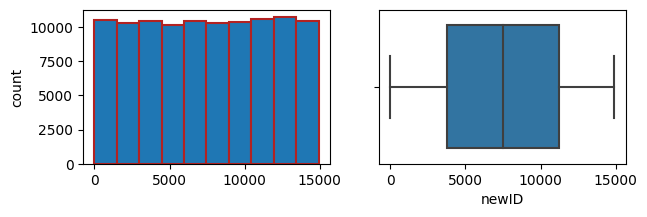

char_jobcode
Skew : 2.81
Kurt : 8.84


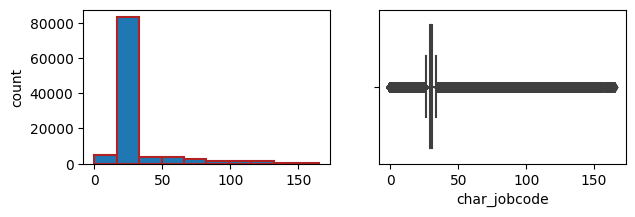

char_level
Skew : 0.43
Kurt : 0.34


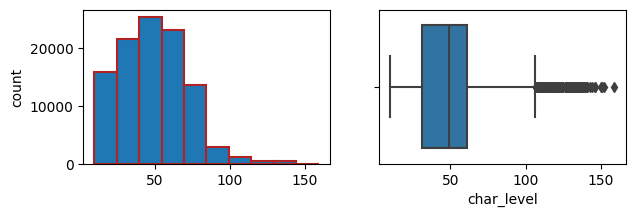

charStatA
Skew : 26.98
Kurt : 1033.0


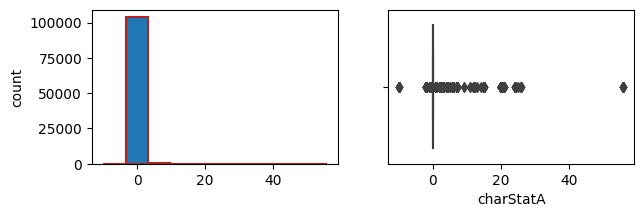

charStatB
Skew : 11.12
Kurt : 122.04


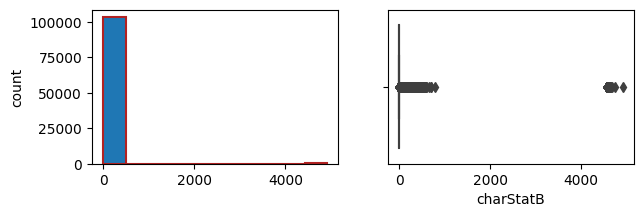

charStatC
Skew : 8.96
Kurt : 82.15


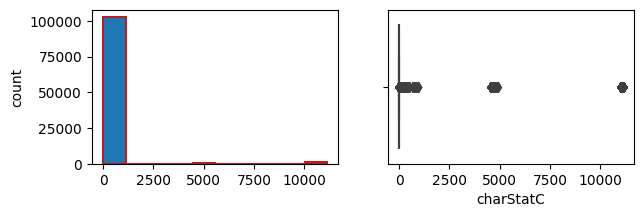

charStatD
Skew : 31.95
Kurt : 1251.52


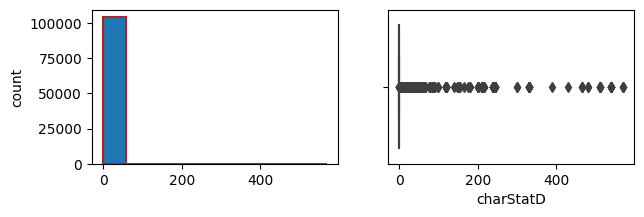

charStatE
Skew : 10.35
Kurt : 119.72


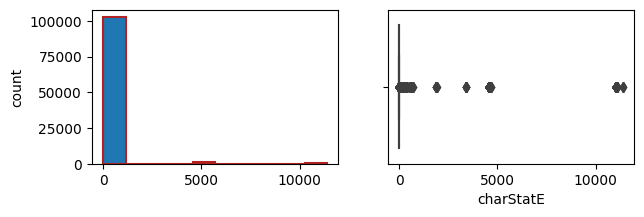

charStatF
Skew : 17.1
Kurt : 291.4


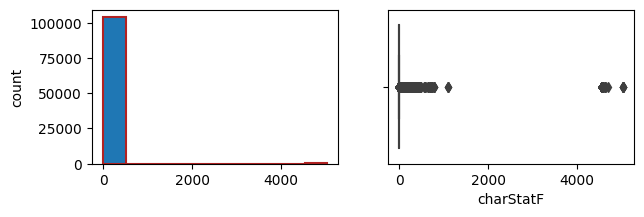

charStatG
Skew : 13.21
Kurt : 176.24


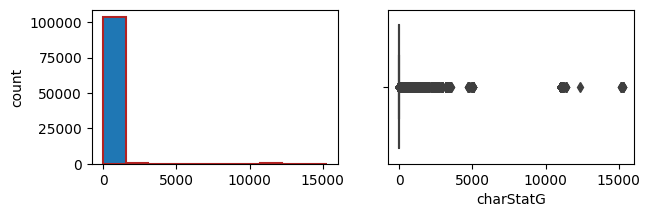

socialAmountA
Skew : 7.33
Kurt : 59.15


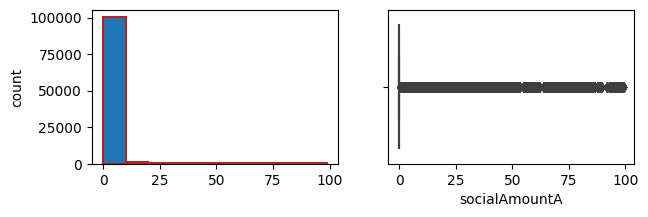

socialBooleanA
Skew : 4.73
Kurt : 20.33


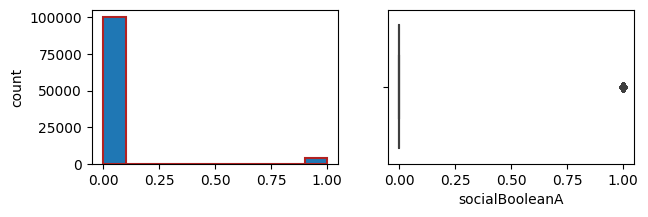

socialBooleanB
Skew : 0
Kurt : 0


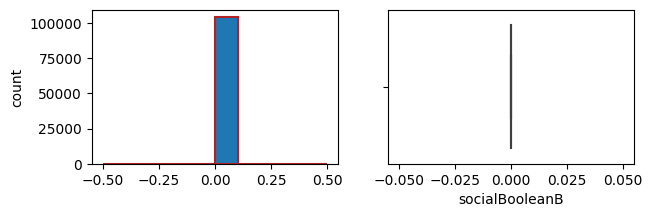

socialSessionAmountA
Skew : 6.68
Kurt : 99.27


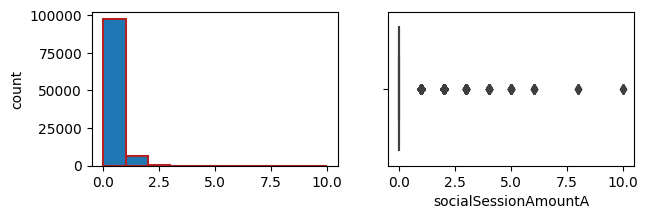

activityCumulativeAmountA
Skew : 3.76
Kurt : 16.99


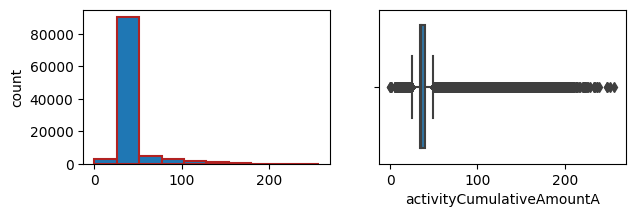

accountMetaAmountA
Skew : 0
Kurt : 0


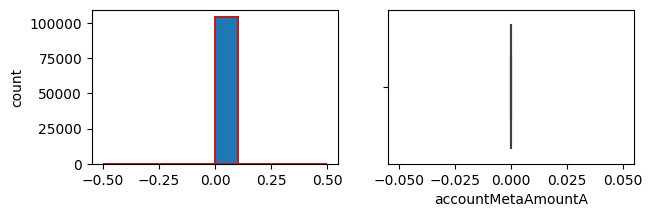

charSessionAmountA
Skew : 3.51
Kurt : 20.44


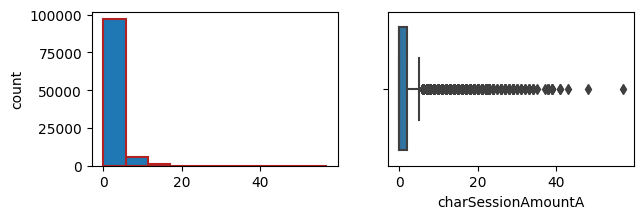

charSessionAmountB
Skew : 0
Kurt : 0


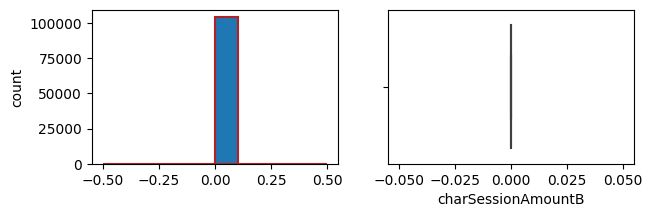

charMoveSessionAmountA
Skew : 7.34
Kurt : 193.0


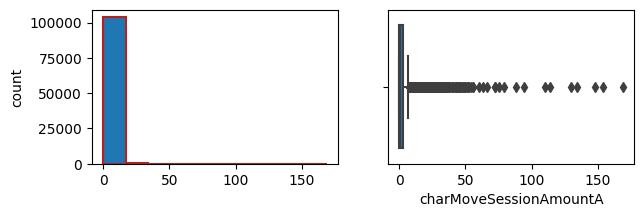

charSessionAmountC
Skew : 53.46
Kurt : 4494.63


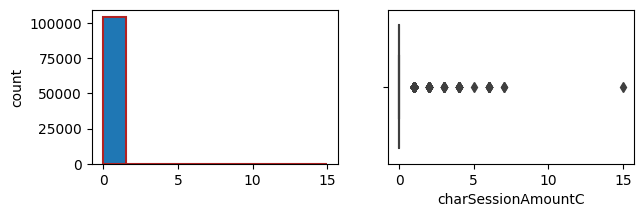

socialSessionAmountB
Skew : 76.63
Kurt : 10000.03


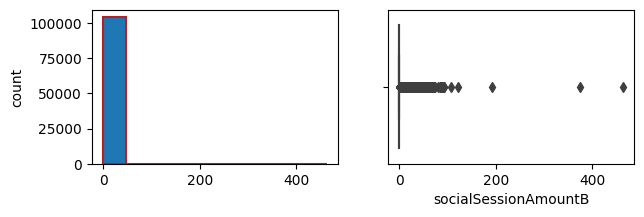

actionSessionAmountA
Skew : 0.78
Kurt : -0.09


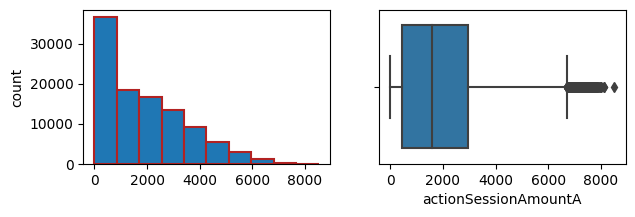

charSessionAmountD
Skew : -0.98
Kurt : 0.91


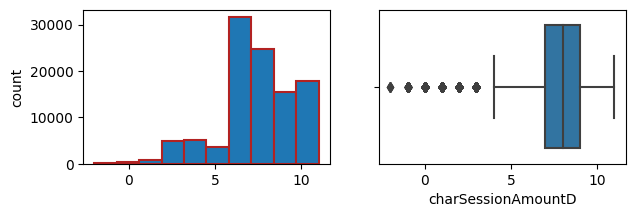

activityCumulativeAmountB
Skew : 0.39
Kurt : 1.24


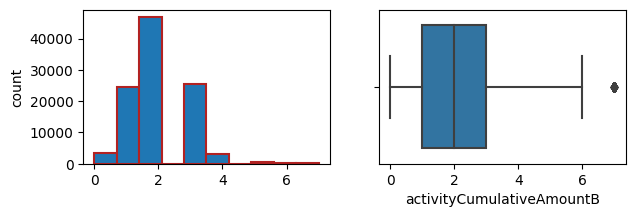

actionSessionAmountB
Skew : 2.17
Kurt : 13.11


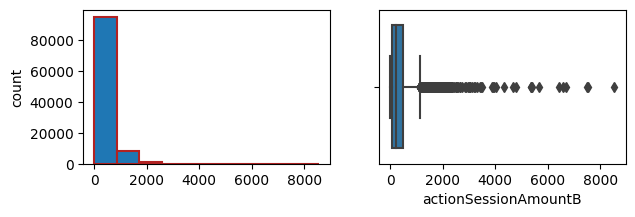

actionSessionAmountC
Skew : 4.69
Kurt : 24.61


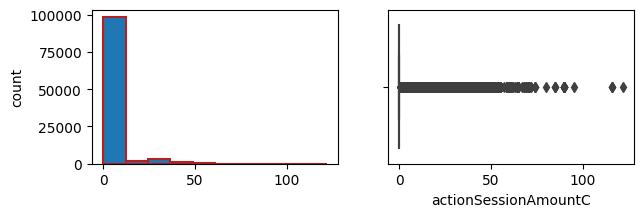

actionSessionAmountD
Skew : 5.75
Kurt : 32.45


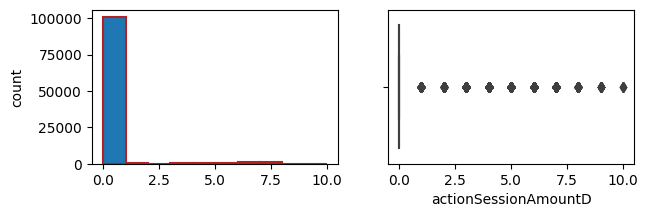

actionSessionAmountE
Skew : 1.97
Kurt : 6.5


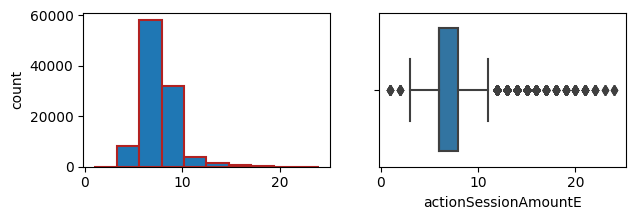

tradeSessionAmountA
Skew : 8.01
Kurt : 65.96


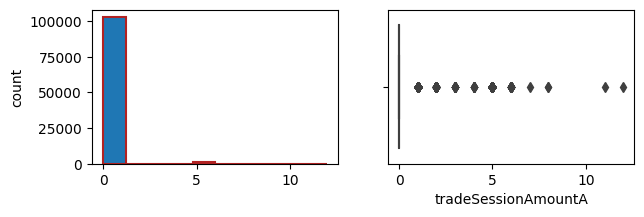

tradeSessionAmountB
Skew : 102.4
Kurt : 12968.97


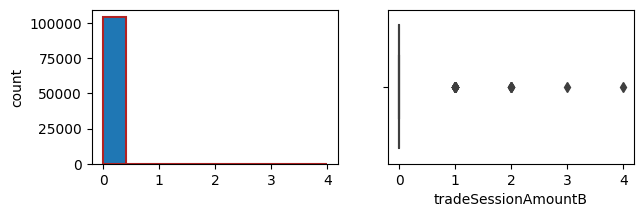

tradeSessionAmountC
Skew : 0
Kurt : 0


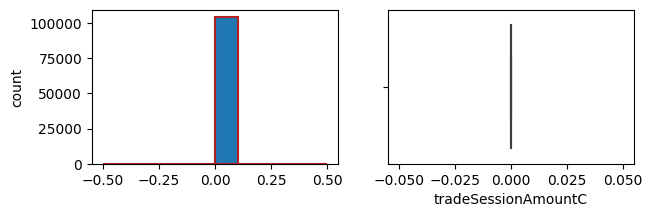

actionSessionAmountF
Skew : 3.7
Kurt : 16.87


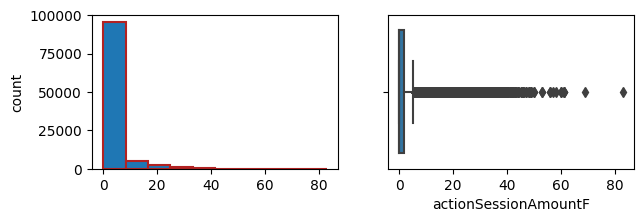

actionSessionAmountG
Skew : 3.92
Kurt : 15.58


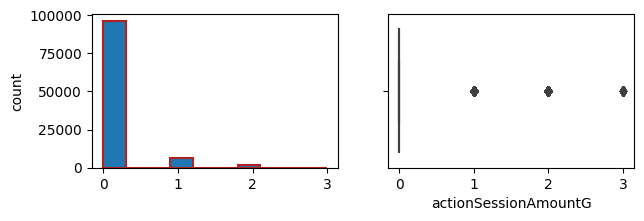

actionSessionAmountH
Skew : 5.93
Kurt : 33.84


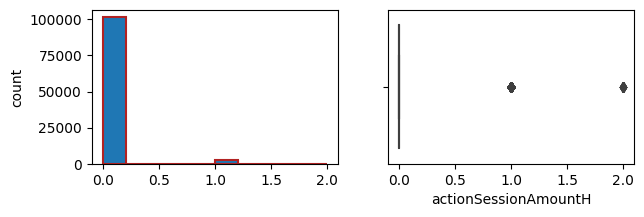

actionSessionAmountI
Skew : 0.42
Kurt : -1.03


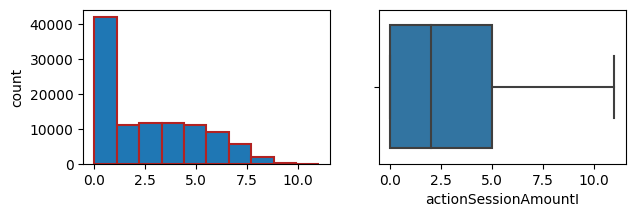

actionSessionAmountJ
Skew : 101.8
Kurt : 18984.61


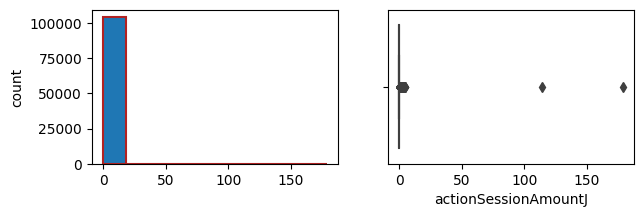

actionSessionAmountK
Skew : 14.82
Kurt : 528.12


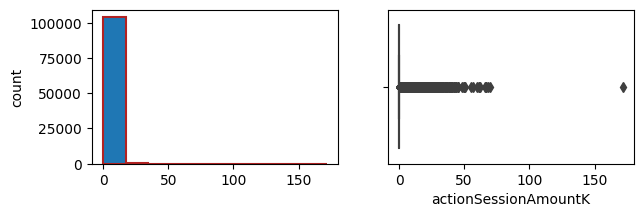

actionSessionAmountL
Skew : 2.56
Kurt : 16.26


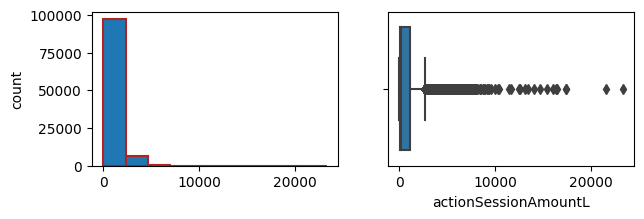

actionSessionAmountM
Skew : 191.0
Kurt : 41569.41


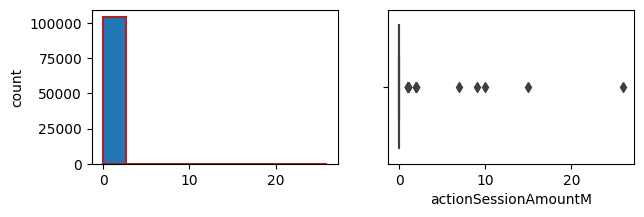

actionSessionAmountN
Skew : 0.77
Kurt : -0.14


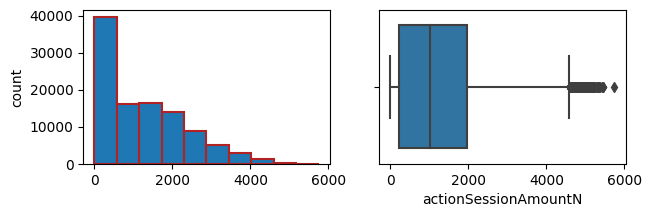

tradeSessionAmountD
Skew : 25.02
Kurt : 1217.41


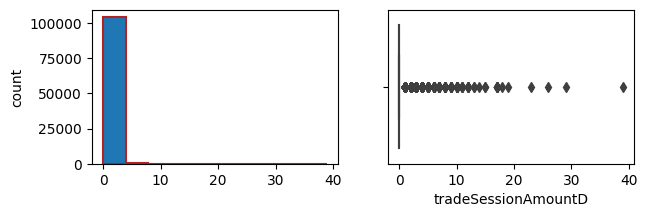

tradeSessionAmountE
Skew : 0
Kurt : 0


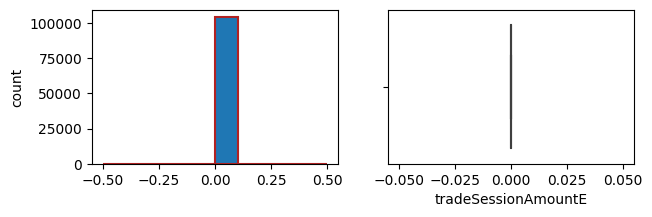

isAbuser
Skew : 2.32
Kurt : 3.77


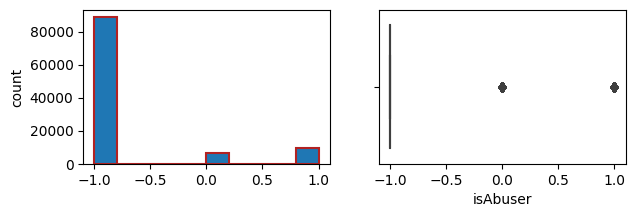

In [45]:
# 전체 분포
# Skew 비대칭도 (왜도) : 정규분포에 가까워질수록 0에 가깝고, 음수일때는 왼쪽 부분에 양수일때는 오른쪽 부분에 긴 꼬리 분포
# Kurt 첨도 : 확률 분포의 뾰족한 정도를 나타냄, 0보다 크면 정규분포보다 뾰족한, 작은 경우 더 완만하고 납작한 분포
num_cols = data.select_dtypes(include=np.number).columns.tolist()

for col in num_cols:
    print(col)
    print('Skew :', round(data[col].skew(), 2))
    print('Kurt :', round(data[col].kurt(), 2))
    plt.figure(figsize = (7, 2))
    plt.subplot(1, 2, 1)
    data[col].hist(grid=False, edgecolor='firebrick', linewidth=1.5)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col])
    plt.show()

### 3. Visualize Abuser VS Non Abuser

<Axes: >

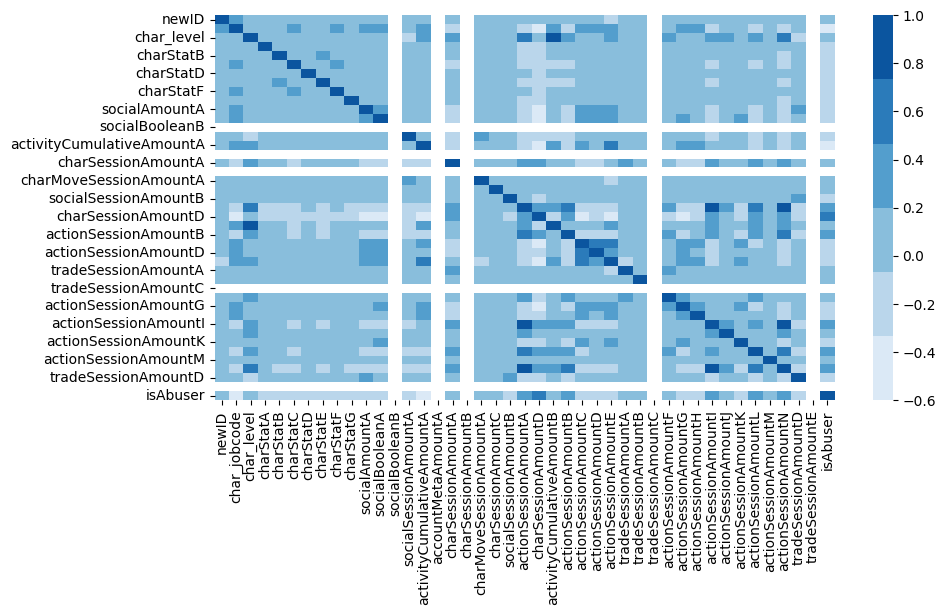

In [51]:
# Known featurer간 상관관계 분석
corr = known.corr()
cmap = sns.color_palette("Blues")
f, ax = plt.subplots(figsize=(10, 5))
mask = np.triu(np.ones_like(corr))
sns.heatmap(corr, cmap=cmap)

In [54]:
# Abuser의 상관관계 찾기
df_corr = known.corr()
df_corr['isAbuser'].sort_values()

char_jobcode                -0.340932
activityCumulativeAmountA   -0.335107
actionSessionAmountG        -0.325352
actionSessionAmountE        -0.311537
actionSessionAmountC        -0.300762
socialBooleanA              -0.252700
socialAmountA               -0.234913
actionSessionAmountD        -0.207662
actionSessionAmountH        -0.198529
charStatC                   -0.171239
tradeSessionAmountD         -0.154818
charStatE                   -0.150280
actionSessionAmountK        -0.148500
socialSessionAmountA        -0.106759
charStatB                   -0.105832
charStatG                   -0.105787
socialSessionAmountB        -0.088253
charStatF                   -0.085850
charStatA                   -0.083639
charStatD                   -0.070508
actionSessionAmountF        -0.040687
tradeSessionAmountB         -0.009798
actionSessionAmountM        -0.009798
charSessionAmountC          -0.007911
activityCumulativeAmountB    0.036069
newID                        0.038431
charMoveSess

In [52]:
# 다중공선성 : 독립 변수간 상관 관계 확인
# condition number가 2.43e+04으로 다중공선성의 문제가 존재하므로, 이를 해결하기 위해 정규화 진행
from statsmodels.formula.api import ols

model = ols("isAbuser ~ charSessionAmountD + actionSessionAmountN + actionSessionAmountA + char_jobcode + activityCumulativeAmountA + actionSessionAmountG+ actionSessionAmountE + actionSessionAmountC", data=known)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               isAbuser   R-squared:                       0.301
Model:                            OLS   Adj. R-squared:                  0.301
Method:                 Least Squares   F-statistic:                     840.0
Date:                Wed, 22 Nov 2023   Prob (F-statistic):               0.00
Time:                        03:56:55   Log-Likelihood:                -8222.1
No. Observations:               15619   AIC:                         1.646e+04
Df Residuals:                   15610   BIC:                         1.653e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [86]:
def plot_diff(feature):
    df_cp = known.copy()
    df_cp['isAbuser'] = df_cp['isAbuser'].astype('category')

    fig, (ax1, ax2) = plt.subplots(2,
                                   figsize=(5, 4),
                                   sharex=True,
                                   gridspec_kw={'height_ratios': (.7, .3)})

    for df, label in zip([df_abuser, df_nonabuser], ['Abuser', 'NonAbuser']):
        sns.histplot(data=df,
                     x=feature,
                     bins=15,
                     alpha=0.66,
                     edgecolor='firebrick',
                     label=label,
                     kde=False,
                     ax=ax1)
    ax1.legend()

    sns.boxplot(x=feature, y='isAbuser', data=df_cp, ax=ax2)
    ax2.set_ylabel('')
    ax2.set_yticklabels(['Abuser', 'NonAbuser'])

    plt.tight_layout();

df_abuser = known[known['isAbuser'] == 1]
df_nonabuser = known[known['isAbuser'] == 0]

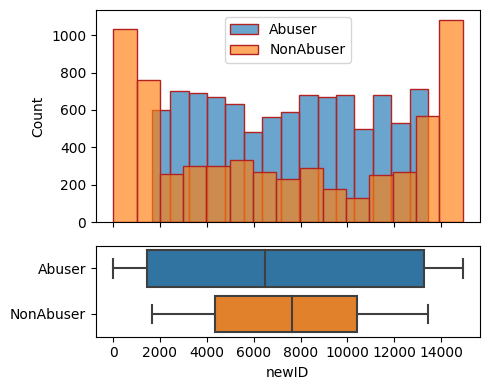

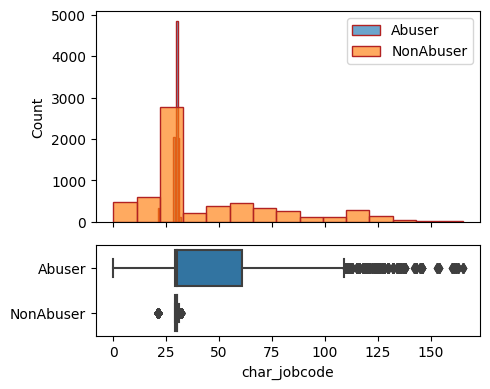

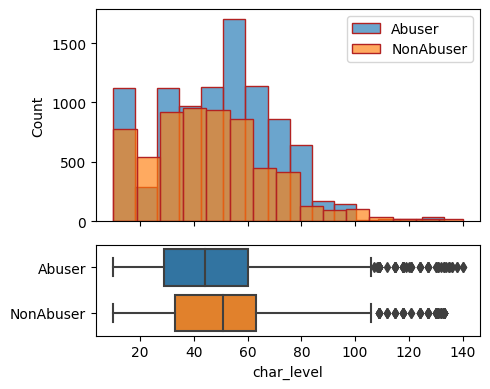

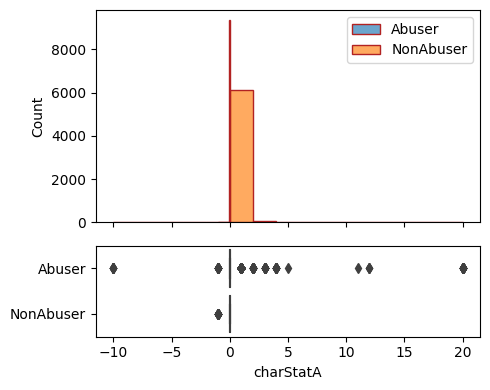

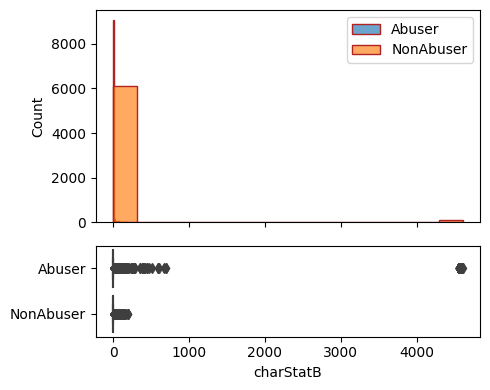

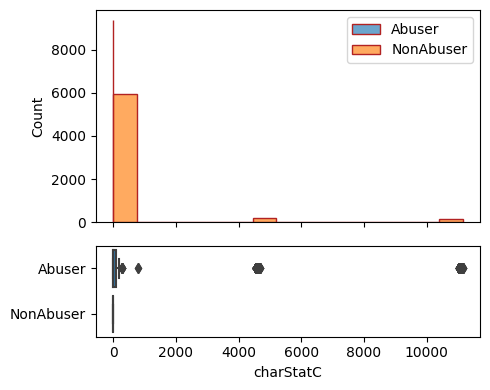

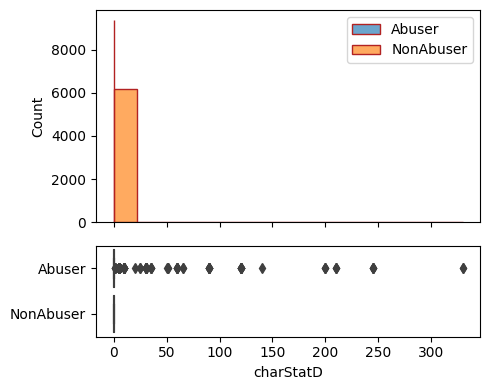

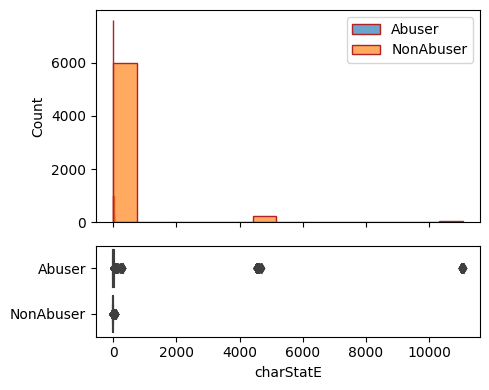

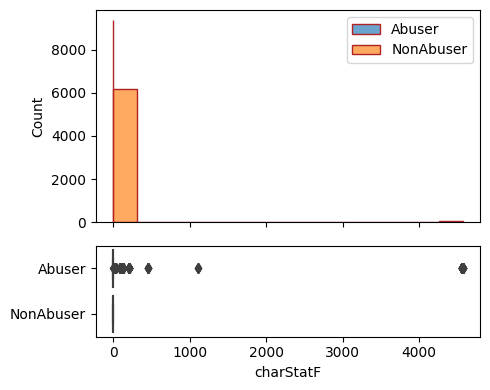

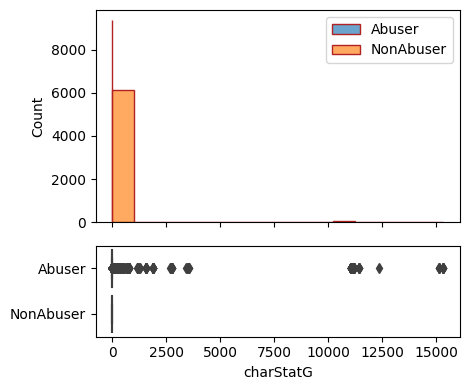

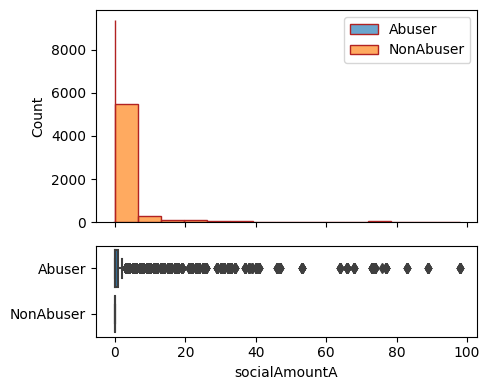

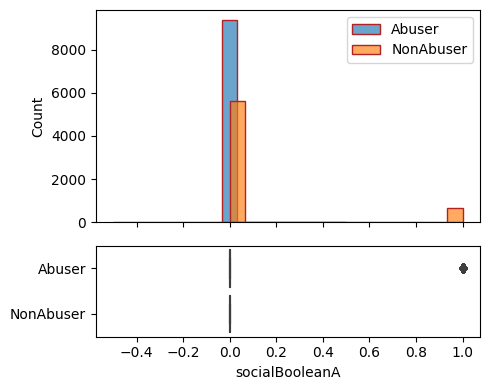

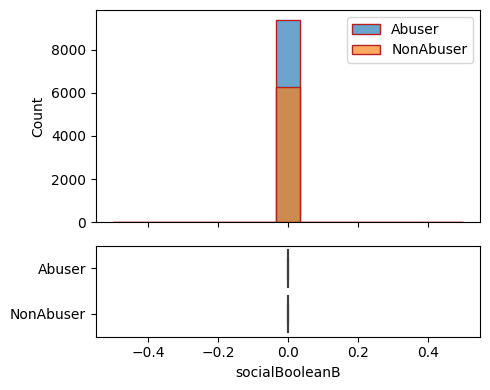

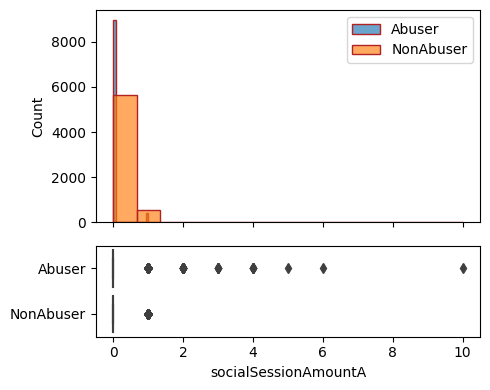

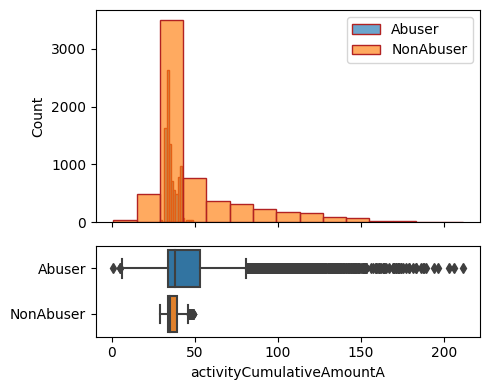

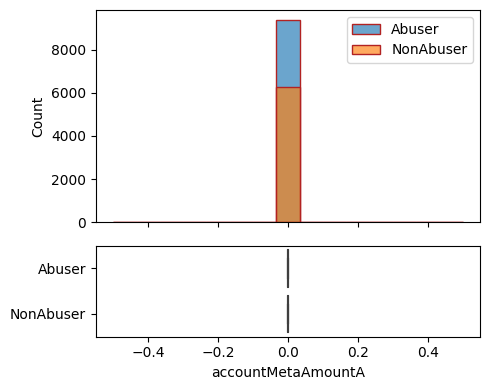

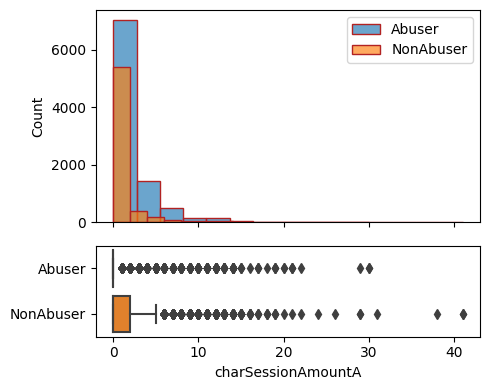

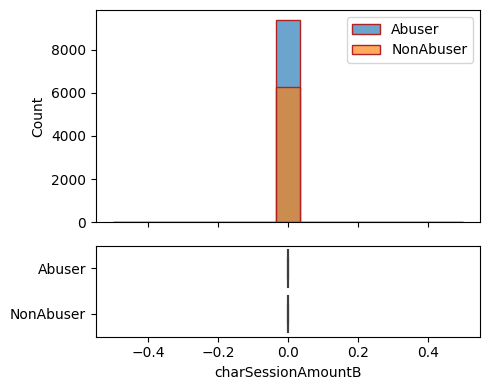

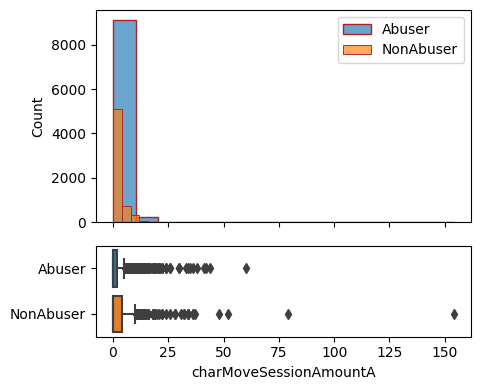

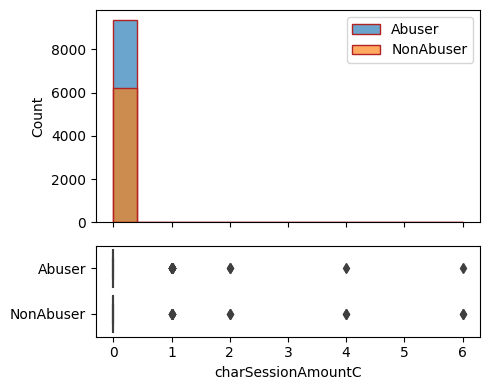

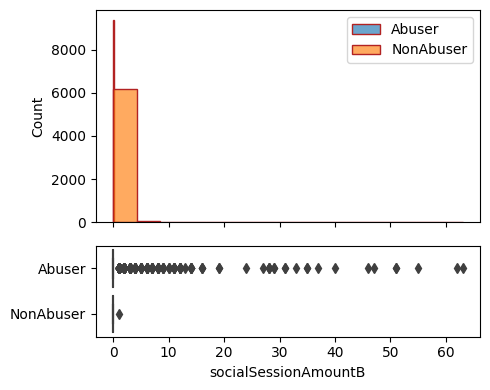

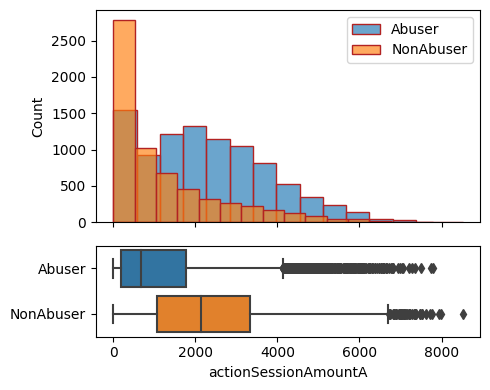

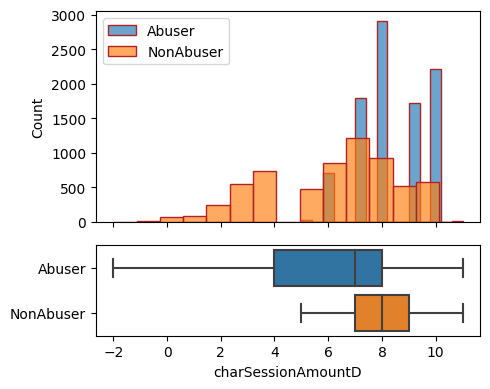

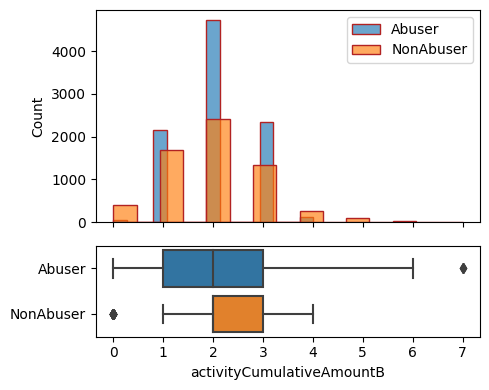

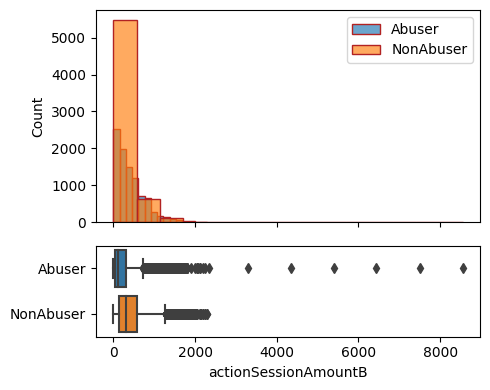

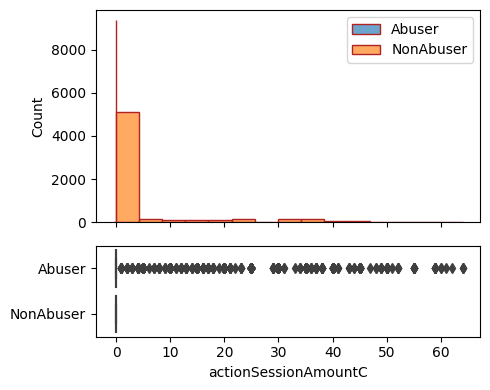

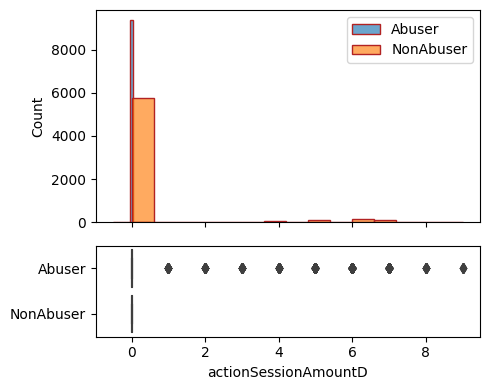

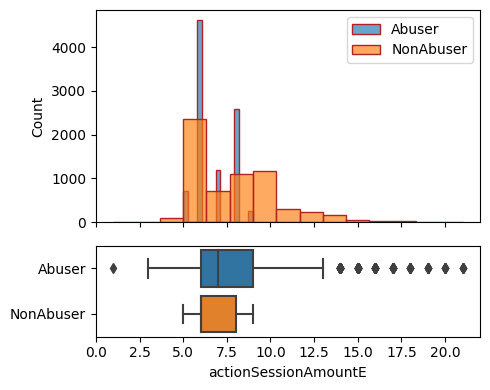

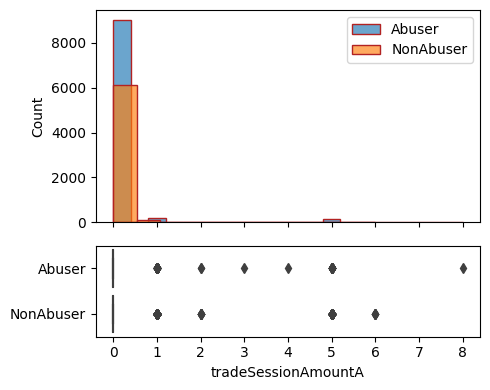

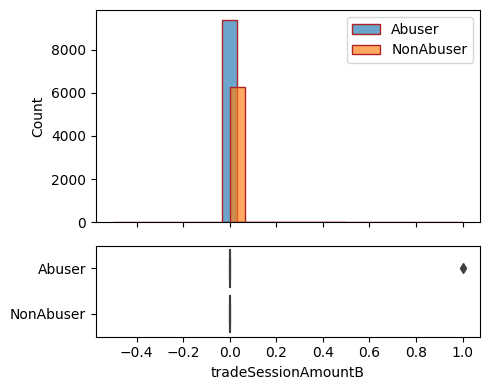

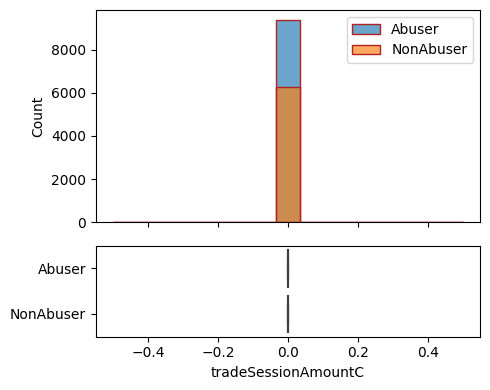

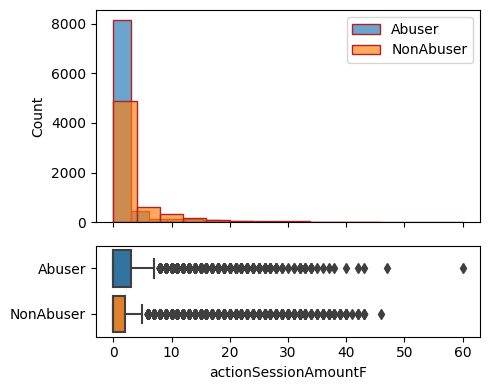

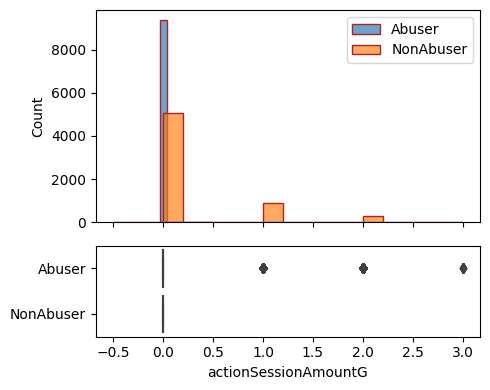

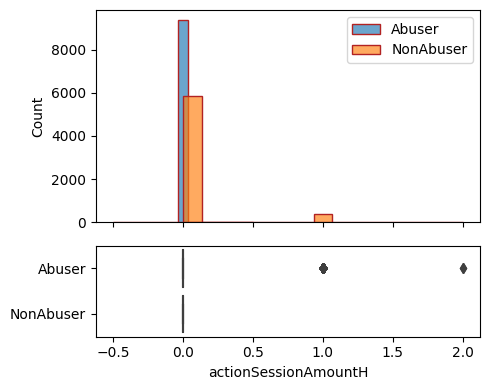

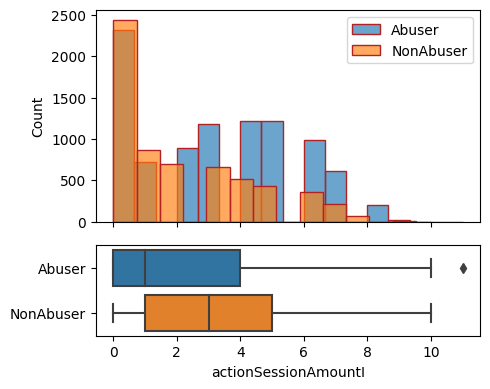

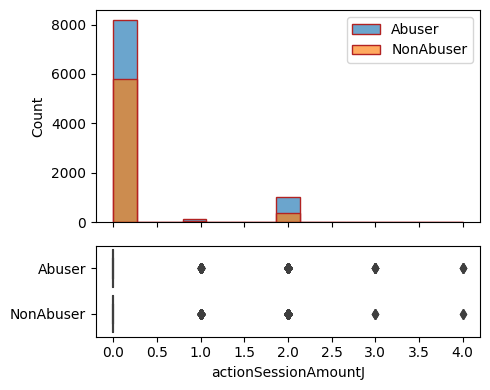

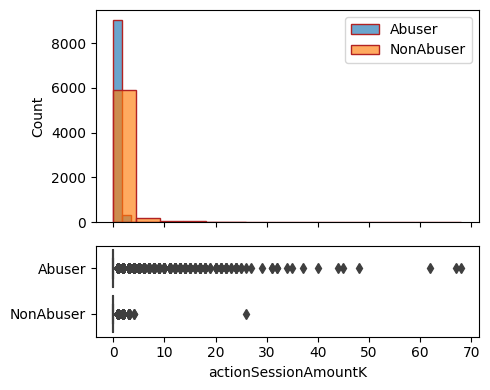

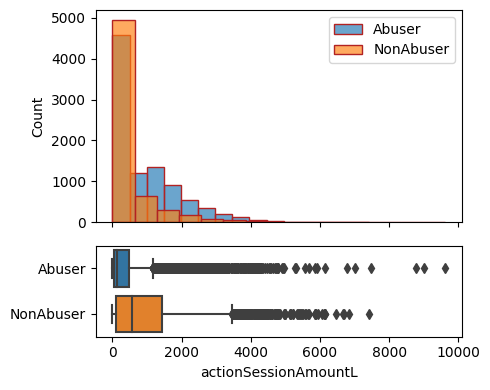

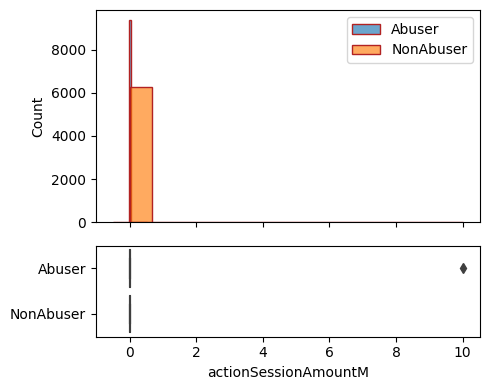

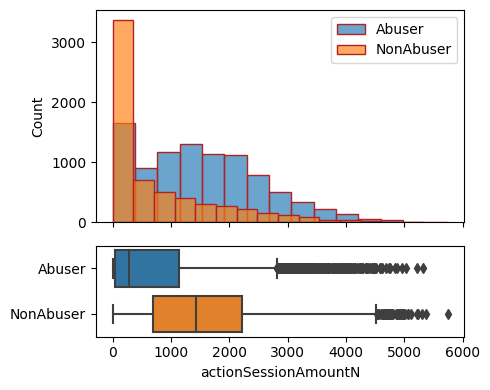

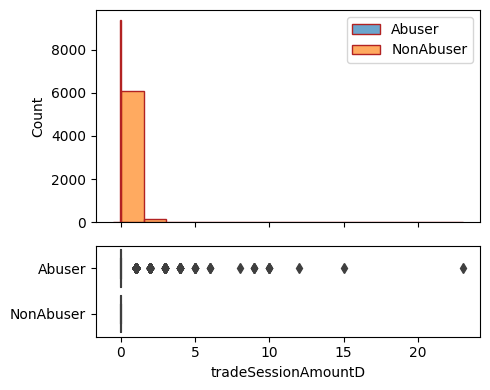

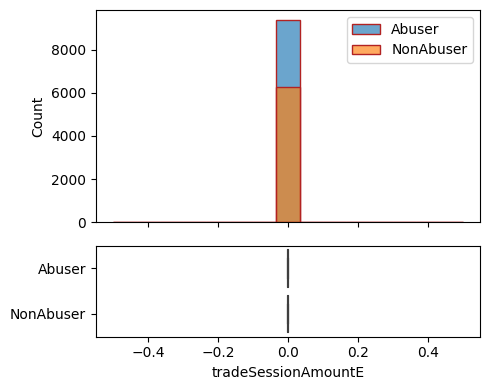

In [87]:
# 어뷰저와 어뷰저가 아닌 데이터 분포
categorical = abuser.select_dtypes(include=np.number).columns.tolist()
categorical.remove('isAbuser')

for col in categorical:
  plot_diff(col)

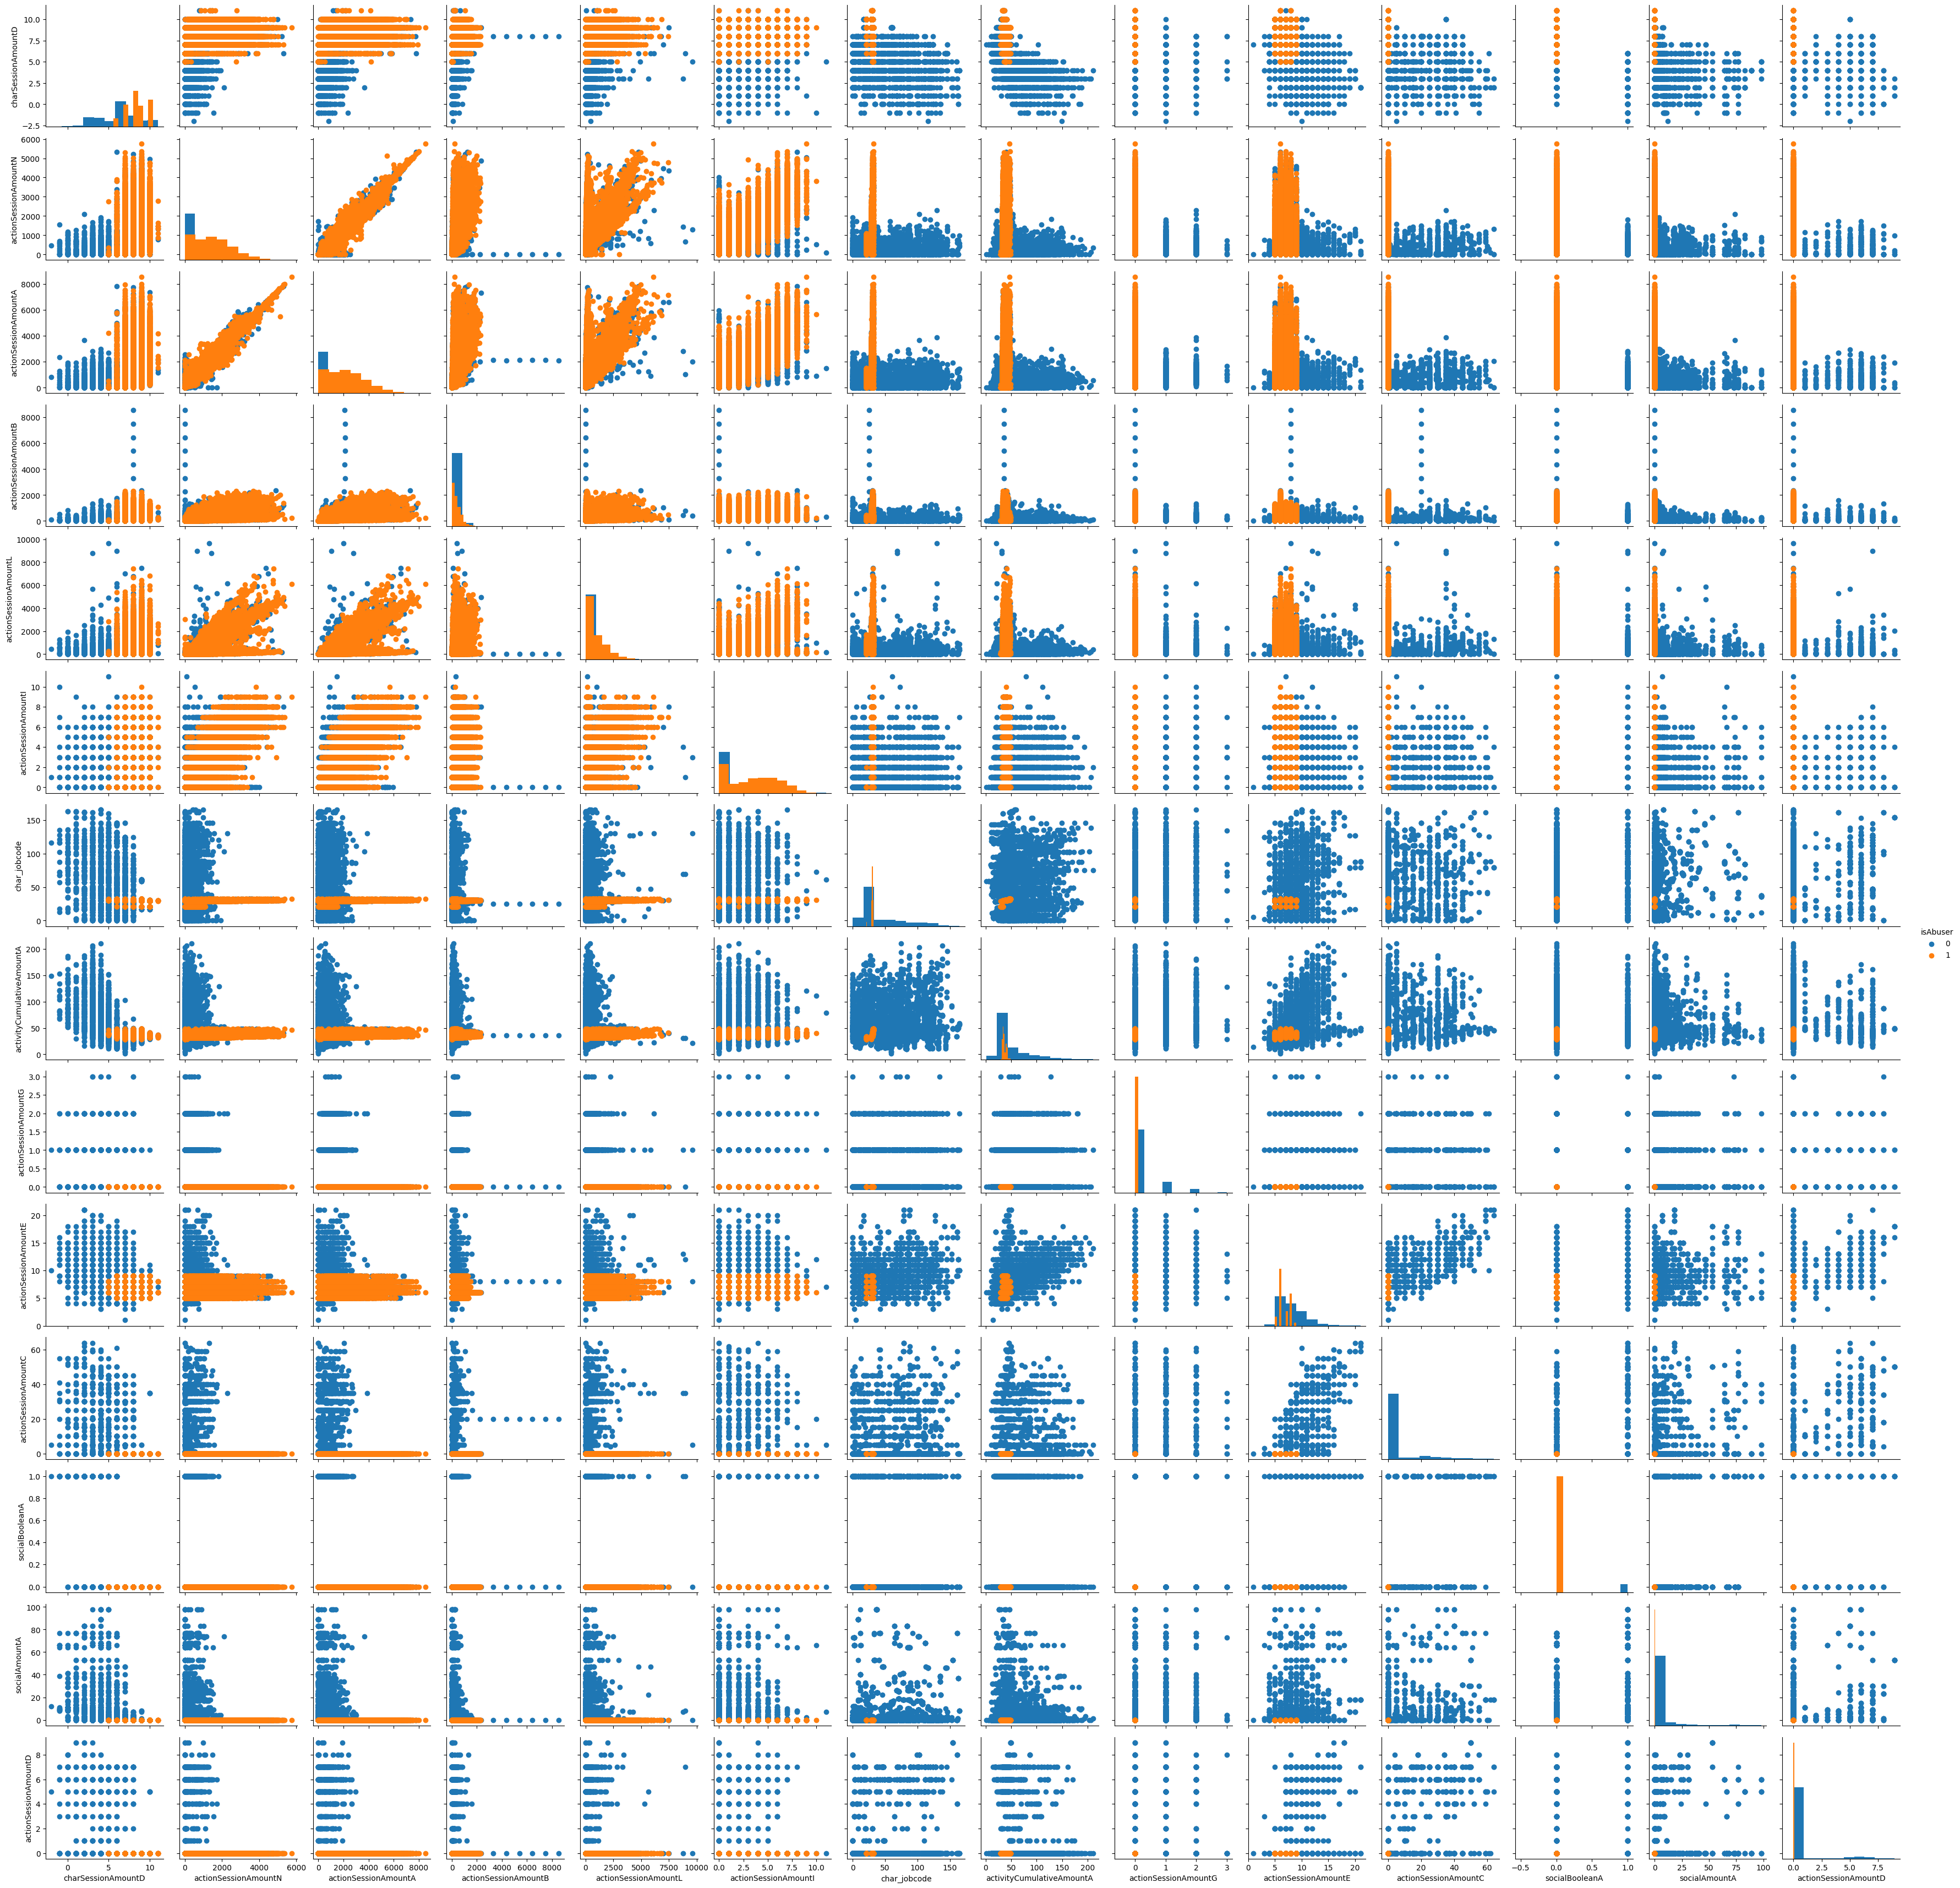

In [ ]:
# 데이터 series들 간의 상관관계
categorical = ['isAbuser', 'charSessionAmountD', 'actionSessionAmountN', 'actionSessionAmountA', 'actionSessionAmountB', 'actionSessionAmountL', 'actionSessionAmountI', 'char_jobcode', 'activityCumulativeAmountA', 'actionSessionAmountG', 'actionSessionAmountE', 'actionSessionAmountC', 'socialBooleanA', 'socialAmountA', 'actionSessionAmountD'  ]

g = sns.PairGrid(known[categorical], hue='isAbuser')
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend()

### 4. Feature Engeeniring

In [76]:
# Feature selection
# 의미있는 특성을 선택할 때, 일반적으로 p-value가 유의미하게 작은 특성들을 선택하는 것이 좋습니다.
# 즉, p-value가 0.05보다 작은 특성들을 우선적으로 고려하여 feature selection을 수행하였습니다.
# 결과적으로 tradeSessionAmountE 를 포함한 8개 항목을 제외하였습니다.
from scipy.stats import chi2_contingency

categorical = known.columns.values.tolist()
categorical.remove('isAbuser')

chi2_array, p_array = [], []
for col in categorical:
    crosstab = pd.crosstab(known[col], known['isAbuser'])
    chi2, p, dof, expected = chi2_contingency(crosstab)
    chi2_array.append(chi2)
    p_array.append(p)

df_chi = pd.DataFrame({
    'Variable': categorical,
    'Chi-square': chi2_array,
    'p-value': p_array
})
df_chi.sort_values(by='Chi-square', ascending=False)

,Variable,Chi-square,p-value
0,newID,15619.000000,0.000000e+00
3,logging_timestamp,15554.421488,4.189080e-01
1,char_jobcode,6925.543438,0.000000e+00
22,actionSessionAmountA,6573.466642,3.420786e-53
40,actionSessionAmountN,6073.943228,7.704496e-127
15,activityCumulativeAmountA,5031.594127,0.000000e+00
23,charSessionAmountD,4407.286823,0.000000e+00
38,actionSessionAmountL,4105.172757,3.346610e-35
25,actionSessionAmountB,3285.403091,4.454315e-129
11,socialAmountA,3039.062207,0.000000e+00
